<a href="https://colab.research.google.com/github/tirals88/Numerical-Mathematics-and-Computing/blob/main/Chap7_Initial%20Values%20Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

%matplotlib inline

# 7.1 테일러 급수법

## 초깃값 문제: 해석 해와 수치 해 비교

ODE ordinary differential equation은 미지의 함수의 1계 또는 그 이상의 $n$계 도함수를 포함하는 방정식이다. 이 장에서는 한 가지 유형의 미분방정식과 한 가지 유형의 보조 조건, 즉 1차 미분방정식에 대한 초깃값 문제 initial-value problem IVP 에 초점을 맞추려 한다. 초깃값 문제의 표준형은 다음과 같다.

\begin{equation}
\begin{cases}
x' &= f(t, x) \\
x(a) &= x_{0}
\end{cases}
\end{equation}

$x$는 $t$의 함수로 상정되므로 더 자세하게 미분방정식을 기술하면 다음과 같다.
\begin{equation}
\frac{dx(t)}{dt} = f(t, x(t))
\end{equation}

미분방정식의 해석 해를 얻기 위한 방법은 많이 있지만 각 방법들의 쓰임은 주로 몇몇 특수한 미분방정식으로만 한정된다. 적용 가능한 경우에는 수식의 형태로 해를 생성할 수 있지만 ***실제 문제에서는 특수한 방법으로도 해를 구할 수 없는 미분방정식이 흔하기 때문에 이런 경우에 수치 해를 모색해야 한다.*** 미분방정식의 수치해는 대개 표의 형태로 얻어진다.

종종 미분방정식에 대해 수치 해를 원하게 되는데 이는 닫힌 형태 ( $x = g(t)$와 같이 독립 변수 $t$의 함수로 표현된 해를 말한다. )의 해가 매우 복잡하고 계산하기 어려울 것으로 예측되거나 다른 선택지가 없기 때문이다.

예를 들어 다음과 같은 미분방정식의 해는 우변을 적분하거나 역도함수를 취함으로써  구할 수 있다.

$$x' = e^{-\sqrt{t^{2} - sin(t)}} + \ln{|sin(t) + tanh(t^{3})}$$

그 과정은 이론적으로는 가능하나 실제로는 가능하지 않다. $x(t)$를 친숙한 함수들로 표현할 수는 없다.

또한 컴퓨터로 상미분방정식을 풀려면 크기가 작은 단계들이 수없이 많이 필요할 수 있으므로 상당한 양의 반올림 오차가 누적될 수 있다. 따라서 다중 정밀도 계산이 필요할 수 있다.


## 미분방정식의 풀이와 적분

미분방정식을 푸는 것과 적분 사이에는 밀접한 관련이 있다. 위의 표준형을 예로 들면 다음의 적분식을 얻을 수 있다.

$$x(a+h) = x(a) + \int^{a+h}_{a}{f(t, x(t))}$$

그리고 사다리꼴 공식으로부터 다음을 얻을 수 있다.

$$x(a+h) = x(a) + \frac{h}{2}[f(t, x(t)) + f(t+h, x(t+h))$$





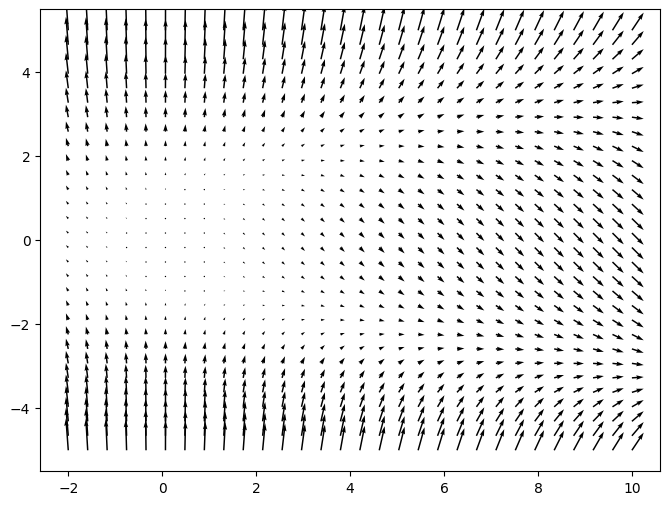

In [ ]:
t,x = np.meshgrid(np.linspace(-2,10,30),np.linspace(-5,5,30))

u = t
v = x**2 - t

plt.figure(figsize=(8, 6))
plt.quiver(t,x,u,v)
plt.show()

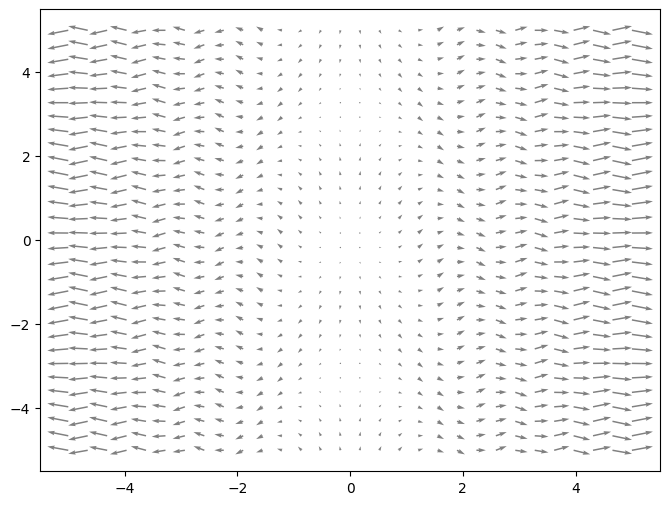

In [ ]:
t,x = np.meshgrid(np.linspace(-5,5,30),np.linspace(-5,5,30))

u = t
v = np.sin(x + t**2)



plt.figure(figsize=(8,6))
plt.quiver(t,x,u,v,color='0.5', alpha=1)
plt.show()

초깃값 문제에서의 해의 유일성

$f$와 $\frac{\partial f}{\partial x}$ 가 $|t-t_{0}|<\beta$로 정의되는 직사각형에서 연속이면 초깃값 문제 $x'=f(t, x),\: x(t_{0}) = x_{0}$는어떤 구간 $|t-t_{0}|<\epsilon$에서 연속인 유일한 해를 갖는다.

## 테일러 급수법

테일러 급수법을 이용한 수치적 방법은 자연스럽고 높은 정밀도를 보여준다. 이는 미분방정식의 해를 국소적으로 테일러 급수의 몇 개 항으로 표현하는 것이다.

미분방정식의 해가 가음과 같이 테일러 급수로 표현된다고 가정하자.

\begin{eqnarray}
x(t+h) &= x(t) &+ hx'(t) + \frac{1}{2!}h^{2}x''(t) + \frac{1}{3!}h^{3}x'' '(t) \\
&&+\frac{1}{4!}h^{4}x^{(4)} + \cdots + \frac{1}{m!}h^{m}x^{(m)}(t) + \cdots
\end{eqnarray}

$\frac{1}{m!}h^{m}x^{(m)}(t)$까지의 항만이 테일러 급수에 포함되었을 때 이로부터 도출되는 방법을 ***$m$차 테일러 급수법***이라 부른다.

오일러 방법의 유사코드는 다음과 같다.



```
def Euler(n, a, b, f):
  h = (b-a)/n
  t = a
  deriv_table = []
  deriv_table.append([0, t, x])
  for k in range(1, n+1):
    x += h*f(t,x)
    t += h
    deriv_table.append([k, t, x])
  deriv_table = pd.Dataframe(deriv_table)
  return deriv_table
```



In [11]:
def Euler(n, a, b, f, x0):
  h = (b-a)/n
  t = a
  x = x0
  deriv_table = []
  deriv_table.append([0, t, x])
  for k in range(1, n+1):
    x += h*f(t,x)
    t += h
    deriv_table.append([k, t, x])
  deriv_table = pd.DataFrame(deriv_table)
  return deriv_table

def ef1(t, x):
  return 1+x**2 + t**3

Euler(100, 1, 2, ef1, -4)

,0,1,2
0,0,1.00,-4.000000
1,1,1.01,-3.820000
2,2,1.02,-3.653773
3,3,1.03,-3.499660
4,4,1.04,-3.356257
...,...,...,...
96,96,1.96,3.349353
97,97,1.97,3.546830
98,98,1.98,3.759084
99,99,1.99,3.988015


이제 얼마나 정확한가를 따져보아야 한다. 위 코드의 경우 두 항만을 사용하기 때문에 결과적인 절단오차는 $\mathcal{O}(h^{2})$이다.

또한 위 코드의 t 업데이트를 보면 t 값에 소량의 반올림 오차가 누적될 수 있다.

```
# 위 코드의 t 업데이트
t += h

# 개선된 t 업데이트
t = a + k*h
```



$n=100$ 일 때, 총 5개의 항을 사용한다. $\frac{1}{24}{h^{4}x^{(4)}(t)}$까지의 항을 계산에 포함하였기 때문에 테일러 급수에 포함되지 않은 첫 항은 $\frac{1}{120}{h^{5}x^{(5)}(t)}$이다.

$|x^{5}(t)|$가 1보다 작을 때, $h^{5} = (10^{-2})^{5} = 10^{-10}$은 소수점 아래 10자리에만 영향을 주고 출력한 해는 아마도 소수점 아래 8자리까지 정확할 것으로 간단하게 예측할 수 있다.

실제로 고려해야 할 오차는 두 종류이다. 각 단계에서 $x(t)$가 알려져 있고 $x(t+h)$가 테일러 급수의 처음 몇 개의 항으로부터 계산된다면 한 오차는 테일러 급수를 잘랐기 때문에 발생한다. 이 오차를 ***절단오차***라 하며 정확하게는 ***국소 절단오차 local truncation error***라고 한다.

위의 경우에서 국소 절단오차가 $h^{5}$의 차수를 갖는다고 일컬어진다.

명백히 존재하는 두 번째 종류의 오차는 모든 국소 절단오차들의 누적된 영향으로 인해 나타나는 것이다. 이미 $x(t)$가 잘못되었는데, $x(t+h)$를 테일러 급수를 사용하여 계산할 때, 또 다른 국소 절단오차가 발생하기 때문에 $x(t+h)$의 계산값 역시 오차를 포함하고 있다.

반올림오차 또한 존재할 수 있다. 이러한 오차들은 특정 단계 하나에서는 심각하지 않더라도 누적된 오차가 계산된 해를 오염시킬 수 있다.

In [ ]:
#1

def exf1(t, x):
  return x + x**2

def exf2(t, x):
  p1 = exf1(t, x)
  return p1 + 2*x*p1

def exf3(t, x):
  p1 = exf1(t, x)
  p2 = exf2(t, x)
  return p2 + 2*p1**2 + 2*x*p2

def exf4(t, x):
  p1 = exf1(t, x)
  p2 = exf2(t, x)
  p3 = exf3(t, x)
  return p3 + 2*x*p3 + 6*p1*p2

def exf5(t, x):
  p1 = exf1(t, x)
  p2 = exf2(t, x)
  p3 = exf3(t, x)
  p4 = exf4(t, x)
  return p4 + 2*x*p4 + 8*p1*p3 + 6*p2**2

def Euler_order5(n, a, b, f1, f2, f3, f4, f5, x0):
  h = (b-a)/n
  t = a
  x = x0
  deriv_table = []
  deriv_table.append([0, t, x])
  for k in range(1, n+1):
    p1 = f1(t, x)
    p2 = f2(t, x)
    p3 = f3(t, x)
    p4 = f4(t, x)
    p5 = f5(t, x)
    x += h*(p1 + h/2*(p2 + h/3*(p3 + h/4*(p4 + h/5 *(p5)))))
    t = a + k*h
    deriv_table.append([k, t, x])
  deriv_table = pd.DataFrame(deriv_table)
  return deriv_table

In [ ]:
exx0 = np.exp(1)/(16 - np.exp(1))
Euler_order5(177, 1, 2.77, exf1, exf2, exf3, exf4, exf5, exx0)

,0,1,2
0,0,1.00,0.204663
1,1,1.01,0.207146
2,2,1.02,0.209665
3,3,1.03,0.212219
4,4,1.04,0.214810
...,...,...,...
173,173,2.73,22.981779
174,174,2.74,30.179341
175,175,2.75,43.716492
176,176,2.76,78.167287


In [ ]:
print("real value : ", np.exp(2.77)/(16 - np.exp(2.77)))

real value :  385.7911760441878


In [ ]:
#3
def exff3(t, x):
  return x

print('Euler\'s method : {}\nreal value : {}\nerror : {}'.format(Euler_order5(1000, 0, 10, exff3, exff3, exff3, exff3, exff3, 1).iloc[-1, -1], np.exp(10), Euler_order5(1000, 0, 10, exff3, exff3, exff3, exff3, exff3, 1).iloc[-1, -1] - np.exp(10)))

Euler's method : 22026.46579477641
real value : 22026.465794806718
error : -3.030800144188106e-08


In [ ]:
#5
def exff51(t, x):
  return t + x + x**2

def exff52(t, x):
  p1 = exff51(t, x)
  return 1 + p1 + 2*x*p1

def exff53(t, x):
  p1 = exff51(t, x)
  p2 = exff52(t, x)
  return p2 + 2*p1**2 + 2*x*p2

def exff54(t, x):
  p1 = exff51(t, x)
  p2 = exff52(t, x)
  p3 = exff53(t, x)
  return p3 + 2*x*p3 + 6*p1*p2

def exff55(t, x):
  p1 = exff51(t, x)
  p2 = exff52(t, x)
  p3 = exff53(t, x)
  p4 = exff54(t, x)
  return p4 + 2*x*p4 + 8*p1*p3 + 6*p2**2

Euler_order5(100, 1, 0, exff51, exff52, exff53, exff54, exff55, 1)

,0,1,2
0,0,1.00,1.000000
1,1,0.99,0.970492
2,2,0.98,0.941938
3,3,0.97,0.914294
4,4,0.96,0.887520
...,...,...,...
96,96,0.04,0.034634
97,97,0.03,0.033930
98,98,0.02,0.033332
99,99,0.01,0.032840


In [3]:
#7
def exff71(t, x):
  return t*x

def exff72(t, x):
  p1 = exff71(t, x)
  return x + p1

def exff73(t, x):
  p1 = exff71(t, x)
  p2 = exff72(t, x)
  return p1 + p2

### x^(n+2) = x^(n+1) + x^(n) 으로 반복

h = (1-0)/200
t = 0
dx1 = 0
x = 1
dx2 = 1
deriv_table = []
deriv_table.append([0, t, x])

for k in range(1, 200+1):
  df_table = [x, t*x] # 미분 계수 저장 리스트 [x, x', ...]
  for i in range(19):
    df_table.append(np.sum(df_table[-2:]))
  nested = df_table[20] * h / 20
  for j in range(19, 0, -1):
    nested = (df_table[j] + nested) * h / j

  x = x + nested
  t = 0 + k*h
  deriv_table.append([k, t, x])
deriv_table = pd.DataFrame(deriv_table)
print('Euler\'s method : {}\nreal value : {}\nerror : {}'.format(deriv_table.iloc[-1, -1], np.exp(.5), deriv_table.iloc[-1, -1] - np.exp(.5)))

Euler's method : 1.6494083778844608
real value : 1.6487212707001282
error : 0.0006871071843326249


In [4]:
#9
def exff91(t, x):
  return np.exp(t)*x

def exff92(t, x):
  p1 = exff91(t, x)
  return np.exp(t)*(x + p1)

def exff93(t, x):
  p1 = exff91(t, x)
  p2 = exff92(t, x)
  return p2 + np.exp(t)*(p1 + p2)

def exff94(t, x):
  p1 = exff91(t, x)
  p2 = exff92(t, x)
  p3 = exff93(t, x)
  return p3 + np.exp(t)*(p1 + p2 + p2 + p3)

def Euler_order4(n, a, b, f1, f2, f3, f4, x0):
  h = (b-a)/n
  t = a
  x = x0
  deriv_table = []
  deriv_table.append([0, t, x])
  for k in range(1, n+1):
    p1 = f1(t, x)
    p2 = f2(t, x)
    p3 = f3(t, x)
    p4 = f4(t, x)
    x += h*(p1 + h/2*(p2 + h/3*(p3 + h/4*(p4))))
    t = a + k*h
    deriv_table.append([k, t, x])
  deriv_table = pd.DataFrame(deriv_table)
  return deriv_table

In [8]:
Euler_order4(200, 2, 0, exff91, exff92, exff93, exff94, 1)
print('Euler\'s method : {}\nreal value : {}\nerror : {}'.format(Euler_order4(200, 2, 0, exff91, exff92, exff93, exff94, 1).iloc[-1, -1], np.exp(1-np.exp(2)), Euler_order4(200, 2, 0, exff91, exff92, exff93, exff94, 1).iloc[-1, -1] - np.exp(1-np.exp(2))))

Euler's method : 0.0016798433841009798
real value : 0.0016798410570681974
error : 2.3270327823964737e-09


In [24]:
#13
def exf131(t, x):
  return t**3 + np.exp(x)

def exf132(t, x):
  p1 = exf131(t, x)
  return 3*t**2 + np.exp(x)*(p1)

def exf133(t, x):
  p1 = exf131(t, x)
  p2 = exf132(t, x)
  return 6*t + np.exp(x)*(p1**2 + p2)

def exf134(t, x):
  p1 = exf131(t, x)
  p2 = exf132(t, x)
  p3 = exf133(t, x)
  return 6 + np.exp(x)*(p1**3 + 3*p1*p2 + p3)

Euler_order4(100, 3, 0, exf131, exf132, exf133, exf134, 7.4)

<ipython-input-24-f0a0b0ac8d97>:3: RuntimeWarning: overflow encountered in exp
  return t**3 + np.exp(x)
<ipython-input-24-f0a0b0ac8d97>:7: RuntimeWarning: overflow encountered in exp
  return 3*t**2 + np.exp(x)*(p1)
<ipython-input-24-f0a0b0ac8d97>:12: RuntimeWarning: overflow encountered in exp
  return 6*t + np.exp(x)*(p1**2 + p2)
<ipython-input-24-f0a0b0ac8d97>:18: RuntimeWarning: overflow encountered in exp
  return 6 + np.exp(x)*(p1**3 + 3*p1*p2 + p3)
<ipython-input-4-1bb3d53d55ed>:31: RuntimeWarning: invalid value encountered in scalar add
  x += h*(p1 + h/2*(p2 + h/3*(p3 + h/4*(p4))))


,0,1,2
0,0,3.00,7.400000e+00
1,1,2.97,1.459725e+06
2,2,2.94,NaN
3,3,2.91,NaN
4,4,2.88,NaN
...,...,...,...
96,96,0.12,NaN
97,97,0.09,NaN
98,98,0.06,NaN
99,99,0.03,NaN


In [35]:
Euler_order4(100, 3, 0, exf131, exf132, exf133, exf134, 3.85)

,0,1,2
0,0,3.00,3.850000
1,1,2.97,3.853647
2,2,2.94,3.855227
3,3,2.91,3.845541
4,4,2.88,3.775091
...,...,...,...
96,96,0.12,-13.730953
97,97,0.09,-13.730989
98,98,0.06,-13.731002
99,99,0.03,-13.731005


In [48]:
#17-(a)
def exf172(t, x):
  return 3*t**2 - 4/t + 1/(1+t**2)

Euler(100, 5, 10, exf172, 17).iloc[[0,1,-2,-1]]

,0,1,2
0,0,5.00,17.000000
99,99,9.95,868.866305
100,100,10.00,883.697080


In [49]:
def Euler_order2(n, a, b, f1, f2, x0):
  h = (b-a)/n
  t = a
  x = x0
  deriv_table = []
  deriv_table.append([0, t, x])
  for k in range(1, n+1):
    p1 = f1(t, x)
    p2 = f2(t, x)
    x += h*(p1 + h/2*(p2))
    t = a + k*h
    deriv_table.append([k, t, x])
  deriv_table = pd.DataFrame(deriv_table)
  return deriv_table

def exf173(t, x):
  return 6*t + 4/(t**2) - 2*t/((1+t**2)**2)

Euler_order2(100, 5, 10, exf172, exf173, 17).iloc[[0,1,-2,-1]]

,0,1,2
0,0,5.00,17.000000
1,1,5.05,20.749605
99,99,9.95,874.407236
100,100,10.00,889.312683


In [38]:
#order 2 가 더 정확한 것을 확인할 수 있음
10**3 - 4*np.log(10) + np.arctan(10) + 4*np.log(5) - np.arctan(5) - 108

889.3251381851189

In [36]:
#17-(c)
def exf171(t, x):
  return (5370-981-x**(3/2)/np.log(2+x))/(321-24*t)

Euler(100, 0, 10, exf171, 0)

,0,1,2
0,0,0.0,0.000000
1,1,0.1,1.367290
2,2,0.2,2.744466
3,3,0.3,4.131588
4,4,0.4,5.528774
...,...,...,...
96,96,9.6,216.001933
97,97,9.7,220.195556
98,98,9.8,224.486157
99,99,9.9,228.878634


# 7.2 룽게-쿠타법 Runge-Kutta method

이 방법은 원래의 미분방정식을 해석적으로 미분하지 않으면서 테일러 급수법을 모방하여 고안된 것이다. 위의 초깃값 문제에서 테일러 급수법을 사용할 때, 함수 $f$를 미분함으로써 $x'', x''', \cdots$을 얻어낼 필요가 있었다. 이러한 요구는 이 방법을 사용하는 데 심각한 장애물이 될 수 있었다.

이는 컴퓨터 프로그램을 작성하기 전에 사전 분석 작업을 수행해야 한다. 룽게-쿠타법은 이를 해결할 수 있는 방법이다.

정확도가 낮아서 실제 과학 계산에서는 잘 사용되지 않는 2차 룽게-쿠타법이 설명을 위해 제시된다.

---

## $f(x,y)$에 대한 테일러 급수

이변수 테일러 급수를 먼저 소개한다. 무한급수로 다음과 같이 나타낼 수 있다.

$$f(x+h, y+h) = \sum^{\infty}_{i=0}{\frac{1}{i!}(h\frac{\partial}{\partial x} + k\frac{\partial}{\partial y})^{i}f(x,y)}$$

낯설게 보이는 항들은 다음과 같이 해석할 수 있다.

\begin{eqnarray}
(h\frac{\partial}{\partial x} + k\frac{\partial}{\partial y})^{0}f(x,y)&=&f\\
(h\frac{\partial}{\partial x} + k\frac{\partial}{\partial y})^{1}f(x,y)&=&h\frac{\partial f}{\partial x} + k\frac{\partial f}{\partial y}\\
(h\frac{\partial}{\partial x} + k\frac{\partial}{\partial y})^{2}f(x,y)&=&h^{2}\frac{\partial^{2} f}{\partial x^{2}} +2hk\frac{\partial^{2} f}{\partial x \partial y} + k^{2}\frac{\partial^{2} f}{\partial y^{2}}\\
&\vdots&
\end{eqnarray}

여기선 $f$ 및 모든 편미분은 $(x,y)$에서 계산된다. 일변수의 경우와 마찬가지로 테일러 급수가 잘렸을 때 급수 양변의 상등 관게를 복원하기 위해서는 오차항 또는 나머지 항이 필요하다.

다음은 이를 적절하게 표현한 식이다.

$$f(x+h, y+h) = \sum^{n-1}_{i=0}{\frac{1}{i!}(h\frac{\partial}{\partial x} + k\frac{\partial}{\partial y})^{i}f(x,y)} + \frac{1}{n!}(h\frac{\partial}{\partial x} + k\frac{\partial}{\partial y})^{n}f(\bar{x}, \bar{y})$$

이 때, 점 $(\bar{x}, \bar{y})$는 평면에서 $(x, y)$와 $(x+h, y+ㅏ)$를 연결한 선분 위에 있는 점이다.

첨자를 이용하여 테일러 급수를 수정하면 다음과 같이 표현할 수 있다.

\begin{eqnarray}
f(x+h, y+k) = f &+& (hf_{x} + kf_{y})\\
&+&\frac{1}{2!}(h^{2}f_{xx} + 2hkf_{xy} + k^{2}f_{yy})\\
&+&\frac{1}{3!}(h^{3}f_{xxx} + 3h^{2}kf_{xxy} + 3hk^{2}f_{xyy} + k^{3}f_{yyy})
&+&\cdots
\end{eqnarray}

## 2차 룽게-쿠타법

